In [1]:
import spotify
import utils

sp = spotify.login(scope='playlist-modify-private')
user = sp.current_user()
username = user['id']
displayName = user['display_name']
displayName

'Mehmet Birgi'

In [2]:
# get all categories 
results = sp.categories(country='CH')['categories']
categories = results['items']
while results['next']:
    results = sp.next(results)['categories']
    categories.extend(results['items'])
print(f"{len(categories)} categories found")

36 categories found


In [3]:
import pandas as pd
pd.set_option('display.max_rows', None)
df_categories = pd.DataFrame(categories).drop(labels=['href', 'icons'], axis='columns')
df_categories

,id,name
0,toplists,Top Lists
1,hiphop,Hip-Hop
2,pop,Pop
3,mood,Mood
4,french_variety,French Pop
5,party,Party
6,edm_dance,Electronic/Dance
7,rock,Rock
8,chill,Chill
9,wellness,Wellness


In [4]:
selected_category_ids = [
#     'edm_dance',
#     'rock',
#     'chill',
#     'roots',
    'soul',
#     'punk',
    'reggae',
    'blues',
    'funk'
]

In [5]:
playlist_ids = set()
for cat_id in selected_category_ids:
    results = sp.category_playlists(cat_id)['playlists']
    new_ids = [plist['id'] for plist in results['items']]
    playlist_ids.update(new_ids)
    print(f"added {len(new_ids)} playlists for category {cat_id}")
    while results['next']:
        results = sp.next(results)['playlists']
        new_ids = [plist['id'] for plist in results['items']]
        playlist_ids.update(new_ids)
        print(f"added {len(new_ids)} playlists for category {cat_id}")
print(f"{len(playlist_ids)} playlists in total")        

added 20 playlists for category soul
added 4 playlists for category soul
added 14 playlists for category reggae
added 20 playlists for category blues
added 1 playlists for category blues
added 13 playlists for category funk
68 playlists in total


In [6]:
[sp.playlist(pid)['name'] for pid in playlist_ids]

['From the Delta to Chicago',
 'Bottoms Up',
 'Dub On The Beach',
 'Acoustic Grit',
 'Push Button Funk',
 'Sweet Soul Chillout',
 'African Heat',
 'Evolution Of Soul',
 '50 Great Female Voices',
 'Funk Outta Here',
 'Lone Star Blues',
 'Carnival',
 'Rare Soul Grooves',
 'Blues Roots',
 'Massive Soca Hits',
 'Brit Blues',
 'Women Of Motown',
 'All Funked Up',
 'The Midnight Hour',
 'Blues Origins',
 'Acid Blues',
 'Workday Soul',
 'Disco Forever',
 'Soul Resistance',
 'Acoustic Soul',
 'One Love',
 'Uplifting Soul Classics',
 'Dancehall Party',
 'Funky Heavy Bluesy',
 'Nu-Blue',
 'Sunshine Reggae',
 'Funk & Soul Classics',
 'Crossroad Blues',
 'Sound Of Motown',
 'Funky Jams',
 'Butter',
 'Chilled Reggae',
 'Blues Classics',
 'Funk / soul / disco',
 '35 Soul Classics 1970–1975',
 "Let's Get Funky",
 'Chicago Blues',
 'Instrumental Funk',
 'Soulful Disco',
 '’80s Jam Session',
 'Soultronic',
 'Soul Lounge',
 "Smokey's Songbook",
 'Next Wave Neo-Soul',
 'Dancehall Queen',
 "Soul 'n' the C

In [7]:
track_ids = set()
for pl_id in playlist_ids:
    tracks = sp.playlist(pl_id)['tracks']
    new_ids = set([item['track']['id'] for item in tracks['items']])
    while tracks['next']:
        tracks = sp.next(tracks)
        new_ids.update([item['track']['id'] for item in tracks['items']])
    track_ids.update(new_ids)
    print(f"added {len(new_ids)} tracks from playlist {pl_id}")

added 55 tracks from playlist 37i9dQZF1DXdkAbM8agIbA
added 59 tracks from playlist 37i9dQZF1DX0N8QTiMHLoT
added 50 tracks from playlist 37i9dQZF1DX6u62UVrRdZV
added 60 tracks from playlist 37i9dQZF1DXaiAJKcabR16
added 42 tracks from playlist 37i9dQZF1DX48ZHftL4a1N
added 65 tracks from playlist 37i9dQZF1DXbcgQ8d7s0A0
added 55 tracks from playlist 37i9dQZF1DWYkaDif7Ztbp
added 31 tracks from playlist 37i9dQZF1DWVGLWeeMNGcG
added 50 tracks from playlist 37i9dQZF1DX9loJQLuEvap
added 50 tracks from playlist 37i9dQZF1DX70TzPK5buVf
added 50 tracks from playlist 37i9dQZF1DXeaMD6NdSui3
added 100 tracks from playlist 37i9dQZF1DX0rM1NjYKMJa
added 75 tracks from playlist 37i9dQZF1DXc9NQwLalzEM
added 64 tracks from playlist 37i9dQZF1DXcFk5r8uS3l2
added 40 tracks from playlist 37i9dQZF1DWW7BONj8RiqI
added 31 tracks from playlist 37i9dQZF1DWWtGE7PB0aRR
added 22 tracks from playlist 37i9dQZF1DX3z6D2ln0Hqx
added 138 tracks from playlist 37i9dQZF1DX4WgZiuR77Ef
added 46 tracks from playlist 37i9dQZF1DXea8

In [8]:
pd.set_option('display.max_rows', 10)
df_audio_features = pd.DataFrame(spotify.get_audio_features_for_tracks(sp, list(track_ids))).drop(
    ['track_href', 'analysis_url', 'type', 'uri', 'loudness'], axis=1)
df_audio_features

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.784,0.708,2,1,0.1100,0.45700,0.000075,0.0913,0.749,120.109,4XsH9zBWPOCdXoH9ZDdS8r,233600,4
1,0.599,0.722,0,0,0.3270,0.44300,0.000000,0.1770,0.494,63.843,6rCKMWLlOmitt21mBgjIGr,139162,3
2,0.565,0.891,9,1,0.0666,0.22300,0.000000,0.0651,0.723,133.971,4YwAU85vS07stZPcswDUZr,202213,4
3,0.485,0.706,9,0,0.0439,0.04060,0.000192,0.3050,0.859,120.355,3UgWZwO5KqlfujQn53UW3I,275800,4
4,0.792,0.682,11,0,0.1730,0.00168,0.000000,0.1690,0.666,84.983,5nLmO6pp71pmiVZwyTPfq9,222893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,0.798,0.229,4,0,0.0955,0.77000,0.000587,0.1140,0.319,119.062,6j3ltnb3g4RQRt8azR7Yf5,229080,4
4769,0.925,0.589,11,0,0.0413,0.01920,0.009380,0.0398,0.819,117.157,0JW9adkIsVTKexxkj653yx,292960,4
4770,0.767,0.925,2,1,0.1070,0.15000,0.000159,0.4090,0.732,113.670,5lAH3vLN4Gc3jDM25cMIgH,385573,4
4771,0.725,0.950,0,1,0.0590,0.05780,0.000035,0.1500,0.962,117.531,6QCUgSDUDjcLKhZiGeaO59,208267,4


In [9]:
# save tracks
import json
import os
folder = 'data'
filename = 'spotify_selected_categories_tracks.json'
if not os.path.exists(folder):
    os.mkdir(folder)
with open(os.path.join(folder, filename), 'w', encoding='utf-8') as f:
    df_audio_features.to_json(path_or_buf=f, orient='records', indent=4)

##### read the file

In [15]:
import json
import os
folder = 'data'
filename = 'spotify_selected_categories_tracks.json'
with open(os.path.join(folder, filename), 'r', encoding='utf-8') as f:
    tracks = json.load(f)
len(tracks)

4773

##### select the suitable tracks:

In [16]:
tempo_min, tempo_max = 126, 130
track_ids = list(df_audio_features[
    (df_audio_features['tempo'] >= tempo_min) & 
    (df_audio_features['tempo'] <= tempo_max) & 
    (df_audio_features['danceability'] >= 0.8) &
    (df_audio_features['liveness'] <= 0.4) &
    (df_audio_features['speechiness'] <= 0.33)
]['id'])
len(track_ids)

27

In [17]:
playlist_id, is_new = spotify.get_playlist_by_name(sp, 
        f"Run Test (Categories) BPM {tempo_min} - {tempo_max}", 
        create_if_none=True)
if playlist_id and is_new:
    print(f"Created new playlist with ID {playlist_id}")
elif playlist_id:
    print(f"Found existing playlist with ID {playlist_id}")
else:
    print("Something went wrong :-(")

Created new playlist with ID 4YrduY0aSHS4Up75fzwP3v


In [18]:
# add tracks to playlist
spotify.add_tracks(sp, playlist_id, track_ids, skip_duplicates=True)

Playlist has 0 existing tracks
Skipping duplicates: True
27 tracks to be added
27 tracks added
OK


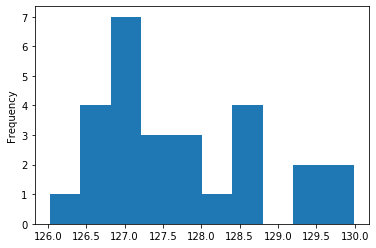

In [19]:
max_ids = 50
tracks_audio_features = []
for i in range(0, len(track_ids), max_ids):
    results = sp.audio_features(track_ids[i:i+max_ids])
    tracks_audio_features.extend(results)
len(tracks_audio_features)
df_audio_features = pd.DataFrame(tracks_audio_features)
df_audio_features['tempo'].plot.hist()

In [20]:
sp.track('spotify:track:3cnvTMZRhkbzea0KC4Y4We')

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/17dXLKGh9AKpooAvGaVt34'},
    'href': 'https://api.spotify.com/v1/artists/17dXLKGh9AKpooAvGaVt34',
    'id': '17dXLKGh9AKpooAvGaVt34',
    'name': 'Junior Murvin',
    'type': 'artist',
    'uri': 'spotify:artist:17dXLKGh9AKpooAvGaVt34'}],
  'available_markets': [],
  'external_urls': {'spotify': 'https://open.spotify.com/album/6iLaRkExmcC6BvxqCk2BTt'},
  'href': 'https://api.spotify.com/v1/albums/6iLaRkExmcC6BvxqCk2BTt',
  'id': '6iLaRkExmcC6BvxqCk2BTt',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b27342637887933e1c8916eba2b4',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e0242637887933e1c8916eba2b4',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d0000485142637887933e1c8916eba2b4',
    'width': 64}],
  'name': 'Police And Thieves',
  'release_date': '1977-01-01',
  're

In [21]:
sp.track('spotify:track:0RAeM2bHnW44bXIv4robTJ')

{'album': {'album_type': 'compilation',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'},
    'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of',
    'id': '0LyfQWJT6nXafLPZqxe9Of',
    'name': 'Various Artists',
    'type': 'artist',
    'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}],
  'available_markets': [],
  'external_urls': {'spotify': 'https://open.spotify.com/album/4DSiH8fLj4U6SaSuPeqoZJ'},
  'href': 'https://api.spotify.com/v1/albums/4DSiH8fLj4U6SaSuPeqoZJ',
  'id': '4DSiH8fLj4U6SaSuPeqoZJ',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2730c7380d77cb53454a9e9dcdc',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e020c7380d77cb53454a9e9dcdc',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048510c7380d77cb53454a9e9dcdc',
    'width': 64}],
  'name': 'Reggae Reggae (International Version)',
  'release